In [72]:
### Importing Libraries

In [52]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [53]:
#Generating preview and statistic of our data 
df = pd.read_csv("diamonds.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [54]:
#checking for null values in dataframe
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [55]:
#checking for duplicates and removing duplicate rows from dataframe
df.duplicated().sum()

0

In [56]:
df.drop_duplicates(inplace = True)

In [57]:
#checking for unique value count 
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [58]:
#numerical column statistical description
df[['carat','depth','table','price','x','y','z']].describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [59]:
Exploratory Data Analysis

SyntaxError: invalid syntax (3683572001.py, line 1)

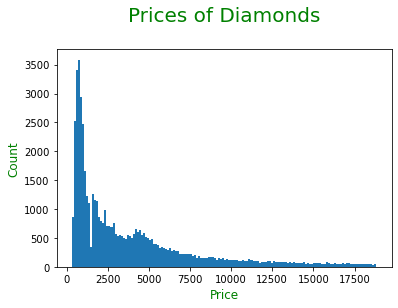

In [60]:
#Univarient analysis frequency plot for price of diamond

plt.hist(df['price'], bins = 150)
plt.title("Prices of Diamonds\n", fontdict={'fontsize': 20,'fontweight' : 20, 'color' : 'Green'})

plt.xlabel("Price", fontdict={'fontsize': 12,'color' : 'Green'})
plt.ylabel("Count", fontdict={'fontsize': 12,'color' : 'Green'})

plt.show()

<AxesSubplot:xlabel='cut', ylabel='count'>

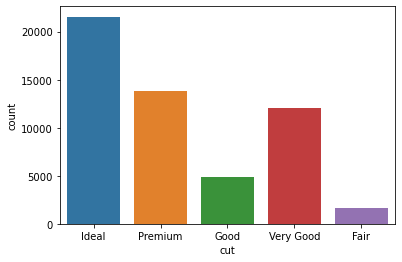

In [64]:
#variation on quality of cut
sns.countplot(data = df, x = 'cut')

<AxesSubplot:xlabel='cut', ylabel='price'>

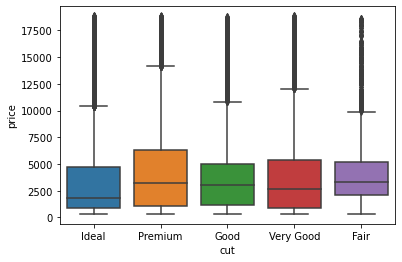

In [67]:

#Investigate the relationship of price with respect to the cut of the diamonds

sns.boxplot(x = 'cut', y = 'price', data = df)

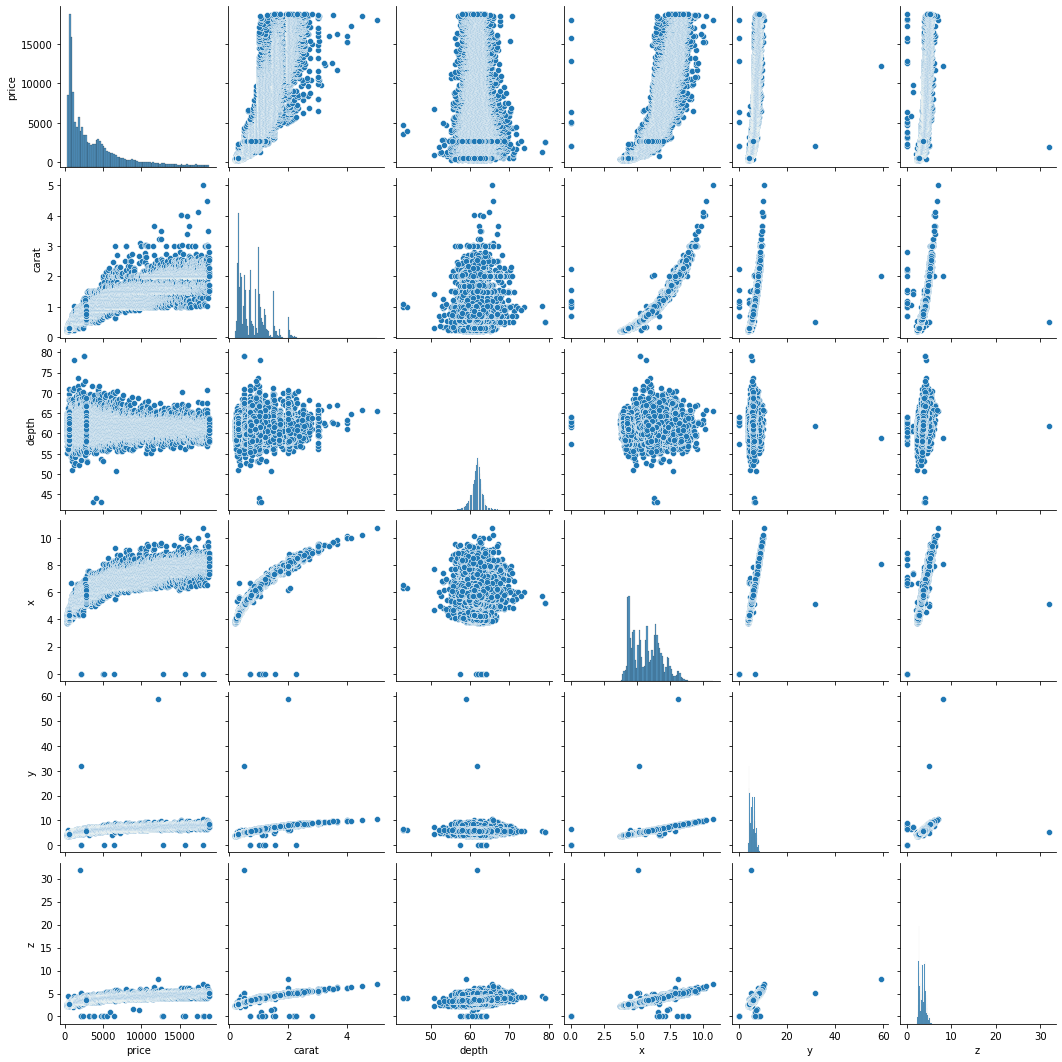

In [68]:
#pairwise relationship
sns.pairplot(df, vars = ['price','carat','depth','x','y','z'], height = 2.5)

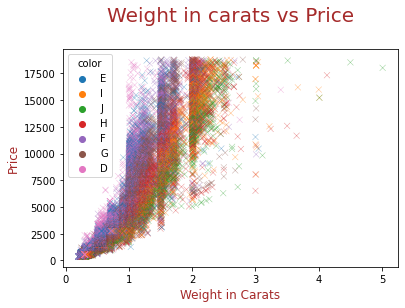

In [69]:
#Multipvarient analysis to show distribution among price respect to carat and color
ax =sns.scatterplot(x='carat',y='price', hue='color',alpha = 0.5, marker="x", data=df)

plt.title("Weight in carats vs Price\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})
plt.xlabel("Weight in Carats", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

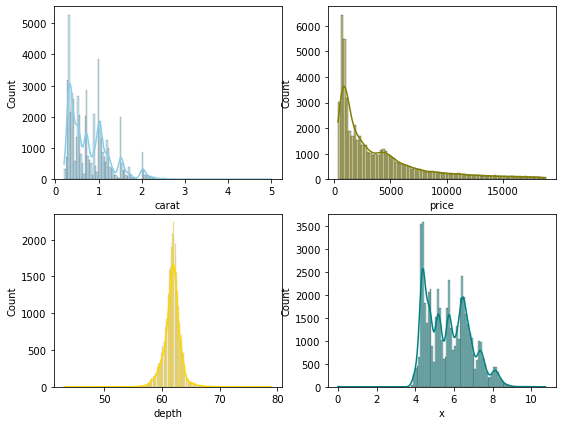

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))

sns.histplot(data=df, x="carat", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="price", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="depth", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="x", kde=True, color="teal", ax=axs[1, 1])

plt.show()

[]

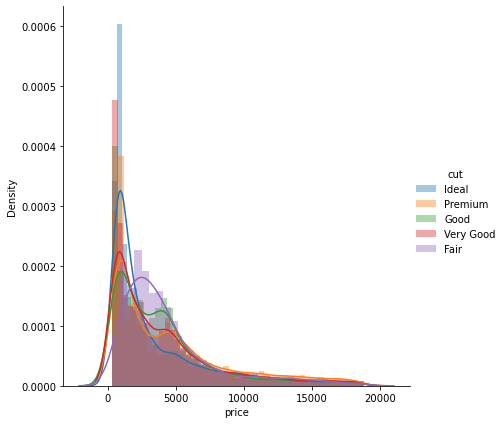

In [71]:
sns.FacetGrid(df, hue = 'cut', height = 6).map(sns.distplot, 'price').add_legend()
plt.plot()

In [73]:
#KNN from Scratch
class KNearestNeighbors():
    def __init__(self,k):
        self.k = 1
        
    def train(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def compute_distance(self ,X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test,num_train))
    
        for i in range(num_test):
            for j in range(num_train):
                distances[i,j] = np.sqrt(np.sum((X_test[i,:] - self.X_train[j,:])**2))
        return distances
        
    def predict(self, X_test):
        distances = self.compute_distance(X_test)
        return self.predict_labels(distances)
    
    def predict_labels(self,distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            y_indices = np.argsort(distances[i,:])
            k_closest_classes = self.y_train[y_indices[:self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))
            
        return y_pred


In [76]:
#In main function implementing KNN from sklearn and checking accuracy of scratch and KNN
def main():
    
    df = pd.read_csv('diamonds.csv',nrows = 1000)
    
    label = LabelEncoder()
    
    df['cut'] = label.fit_transform(df['cut'].astype('str'))
    df['color'] = label.fit_transform(df['color'].astype('str'))
    df['clarity'] = label.fit_transform(df['clarity'].astype('str'))
    
    # Features
    X = df.drop('price',axis=1).values
    # Target Feature
    y = df['price'].values
    
    # Splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = None)
    
    # Scaling
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # Fitting the Model
    KNN = KNearestNeighbors( k = 5 )
    KNN.train( X_train , y_train )
    
    # Prediction
    y_pred = KNN.predict(X_test)
    # Check Accuracy of Model
    print('Accuracy of the Scratch Model :',r2_score( y_test , y_pred ))
    
    # Fitting the Model by sklearn
    knn = KNeighborsRegressor( n_neighbors = 5 )
    knn.fit( X_train , y_train )
    y_pred_sklearn = knn.predict( X_test )
    
    # Check Accuracy of the sklearn Model
    print('Accuracy of the sklearn Model :',r2_score( y_test , y_pred_sklearn ))

In [77]:
if __name__ == '__main__' :
    main()

Accuracy of the Scratch Model : 0.9990553723425065
Accuracy of the sklearn Model : 0.9991634847819658
